In [1]:

import pandas as pd 
import numpy as np
import plotly 
from matplotlib import pyplot as plt
import os 



In [2]:
data_file_path = "C:/Users/govindd1/Downloads/compenstion_data.csv"

In [14]:
df = pd.read_csv(data_file_path)

c:\Users\govindd1\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (22,33,34,35,36,37,38,39,40,41,42,43,44,45,46) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


##### * Normal EDA to find the nature of Data 

In [15]:
#checking the Fillrate 
null_rate = (df.isnull().sum()/len(df))*100
null_rate = null_rate.drop(null_rate[null_rate == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' : null_rate})
missing_data.head(20)

,Missing Ratio
PTD Date,99.885995
PPD Non-Scheduled Loss Date,97.677162
First Appeal Date,96.428129
Section 32 Date,94.534755
Controverted Date,90.357545
PPD Scheduled Loss Date,88.207071
OIICS Secondary Source Description,74.620505
OIICS Secondary Source Code,74.620505
OIICS Injury Source Description,74.619772
OIICS Injury Source Code,74.619772


In [16]:
df.drop(['PTD Date', 'PPD Non-Scheduled Loss Date', 'First Appeal Date', 'Section 32 Date', 'Controverted Date', 'PPD Scheduled Loss Date' ], axis=1, inplace=True)


In [17]:
df.columns

Index(['Accident', 'Accident Date', 'Age at Injury',
       'Alternative Dispute Resolution', 'ANCR Date', 'Assembly Date',
       'Attorney/Representative', 'Average Weekly Wage', 'Birth Year',
       'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'Claim Type', 'Closed Count',
       'County of Injury', 'COVID-19 Indicator', 'Current Claim Status',
       'District Name', 'First Hearing Date', 'Gender', 'Hearing Count',
       'Highest Process', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Interval Assembled to ANCR',
       'Medical Fee Region', 'Occupational Disease',
       'OIICS Event Exposure Code', 'OIICS Event Exposure Description',
       'OIICS Injury Source Code', 'OIICS Injury Source Description',
       'OIICS Nature of Injury Code', 'OIICS Nature of Injury Description',
       'OIICS Part Of Body Code', 'OIICS Part Of Body Description',
       'OIICS Secondary Source Code', 'OIICS Secondary 

In [18]:
# removing less relevant columns 

df.drop(['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 
       'COVID-19 Indicator', 'Highest Process', 'IME-4 Count','C-2 Date',
       'C-3 Date', 'Highest Process', 'IME-4 Count', 'Hearing Count'], axis=1, inplace=True)


In [11]:
df.columns

Index(['Accident', 'Accident Date', 'Age at Injury',
       'Alternative Dispute Resolution', 'ANCR Date', 'Assembly Date',
       'Attorney/Representative', 'Average Weekly Wage', 'Birth Year',
       'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'Claim Type', 'Closed Count',
       'County of Injury', 'Current Claim Status', 'District Name',
       'First Hearing Date', 'Gender', 'Hearing Count', 'Industry Code',
       'Industry Code Description', 'Interval Assembled to ANCR',
       'Medical Fee Region', 'Occupational Disease',
       'OIICS Event Exposure Code', 'OIICS Event Exposure Description',
       'OIICS Injury Source Code', 'OIICS Injury Source Description',
       'OIICS Nature of Injury Code', 'OIICS Nature of Injury Description',
       'OIICS Part Of Body Code', 'OIICS Part Of Body Description',
       'OIICS Secondary Source Code', 'OIICS Secondary Source Description',
       'Zip Code'],
      dtype='object')

In [19]:
df = df.dropna(how='all')

In [20]:
df['Age at Injury'].mean()

38.75721021254732

In [21]:
df['Age at Injury'].median()

41.0

In [22]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'])

In [23]:
df['accident_year'] = df['Accident Date'].dt.strftime('%Y')
df['accident_year'] = pd.to_numeric(df['accident_year'], errors='coerce').convert_dtypes() 
df['accident_year'] 

0          2021
1          2021
2          2006
3          2013
4          2022
           ... 
4499793    1999
4499794    2004
4499795    1991
4499796    1994
4499797    1986
Name: accident_year, Length: 4499798, dtype: Int64

In [24]:
df['accident_month'] = df['Accident Date'].dt.strftime('%m')
df['accident_month'] = pd.to_numeric(df['accident_month'], errors='coerce').convert_dtypes() 
df['accident_month'] 

0           9
1          11
2           8
3           3
4           5
           ..
4499793    12
4499794    12
4499795     6
4499796     7
4499797     2
Name: accident_month, Length: 4499798, dtype: Int64

In [25]:
value_counts = df['accident_year'].value_counts()
value_counts

2019    299951
2018    298396
2017    285143
2016    276255
2015    268886
         ...  
1936         1
1938         1
1943         1
1952         1
1956         1
Name: accident_year, Length: 88, dtype: Int64

In [26]:
df['Birth Year'].value_counts()

0       550420
1963    110710
1964    108926
1961    107016
1962    106821
         ...  
1900         3
1906         3
2018         2
2014         2
2012         2
Name: Birth Year, Length: 117, dtype: int64

##### * find the lag in days inbetween each processes

In [27]:
df['Accident Date'] = pd.to_datetime(df['Accident Date'])
df['ANCR Date']  = pd.to_datetime(df['ANCR Date'])
# df['Controverted Date']  = pd.to_datetime(df['Controverted Date'])
# df['Section 32 Date']  = pd.to_datetime(df['Section 32 Date'])
# df['Assembly Date']  = pd.to_datetime(df['Assembly Date'])
# df['']  = pd.to_datetime(df[''])


In [28]:
# days inbetween Accident and reporting to insurance company
df['days_btw_accident_and_claim_estd'] =  df['ANCR Date'] - df['Accident Date']
df['days_btw_accident_and_claim_estd'].value_counts()

105 days      11577
98 days       11505
112 days      11407
119 days      11322
126 days      11301
              ...  
14237 days        1
6896 days         1
5986 days         1
7073 days         1
8347 days         1
Name: days_btw_accident_and_claim_estd, Length: 8140, dtype: int64

In [29]:
# days inbetween accident occured and reported to insurance company where the worker has lost employment more than a week
# df['days_btw_accident_and_claim_assembled_morethan_one_week'] =  df['Assembly Date'] - df['Accident Date']
# df['days_btw_accident_and_claim_assembled_morethan_one_week'].value_counts()

In [30]:
# days inbetween claim registeres and claim compensation negotiated 
# df['days_btw_claim_est_and_negotiated'] = df['Section 32 Date'] - df['ANCR Date']
# df['days_btw_claim_est_and_negotiated'].value_counts()

In [31]:
#removing data before the year 2000
df = df[df['accident_year']>=2000]
df.shape

(4392532, 39)

In [32]:
df['accident_year'].value_counts(sort = 'Ascending')

2019    299951
2018    298396
2017    285143
2016    276255
2015    268886
2021    249393
2014    246947
2020    231566
2013    178969
2001    176909
2000    170036
2012    169497
2002    157768
2011    154197
2003    149893
2004    143999
2008    141819
2010    140611
2009    140231
2005    140141
2007    138532
2006    137053
2022     96340
Name: accident_year, dtype: Int64

##### * grouping similar body parts together and creating another column


In [33]:
df['OIICS Part Of Body Description'].value_counts()

BACK, INCLUDING SPINE, SPINAL CORD        210699
MULTIPLE BODY PARTS                       160930
LEG(S)                                    142085
SHOULDER, INCLUDING CLAVICLE, SCAPULA      98198
FINGER(S), FINGERNAIL(S)                   75325
WRIST(S)                                   69130
ANKLE(S)                                   51029
ARM(S)                                     40919
NECK, EXTERNAL                             30670
FOOT(FEET), EXCEPT TOE(S)                  26856
UPPER EXTREMITIES, MULTIPLE LOCATIONS      26253
ABDOMEN                                    25899
HAND(S), EXCEPT FINGER(S)                  23865
CHEST, INCLUDING RIBS, INTERNAL ORGANS     21383
CRANIAL REGION, INCLUDING SKULL            20366
LOWER EXTREMITIES, MULTIPLE LOCATIONS      17285
FACE                                       16893
TRUNK, MULTIPLE LOCATIONS                  14787
PELVIC REGION                              11193
BODY SYSTEMS                               10355
EAR(S)              

In [34]:
#Arms
df.loc[(df['OIICS Part Of Body Description'] == "FINGER(S), FINGERNAIL(S)"), 'injured_body_part'] = "Arms"
df.loc[(df['OIICS Part Of Body Description'] == "WRIST(S)"), 'injured_body_part'] = "Arms"
df.loc[(df['OIICS Part Of Body Description'] == "ARM(S)"), 'injured_body_part'] = "Arms"
df.loc[(df['OIICS Part Of Body Description'] == "FINGER(S), FINGERNAIL(S)"), 'injured_body_part'] = "Arms"

#Face
df.loc[(df['OIICS Part Of Body Description'] == "CRANIALREGION, INCLUDING SKULL"), 'injured_body_part'] = "Face"
df.loc[(df['OIICS Part Of Body Description'] == "FACE"), 'injured_body_part'] = "Face"
df.loc[(df['OIICS Part Of Body Description'] == "EAR(S)"), 'injured_body_part'] = "Face"
df.loc[(df['OIICS Part Of Body Description'] == "HEAD,UNS."), 'injured_body_part'] = "Face"
df.loc[(df['OIICS Part Of Body Description'] == "HEAD,MULTIPLE LOCATIONS"), 'injured_body_part'] = "Face"
df.loc[(df['OIICS Part Of Body Description'] == "HEAD,N.E.C."), 'injured_body_part'] = "Face"

#Legs
df.loc[(df['OIICS Part Of Body Description'] == "LEG(S)"), 'injured_body_part'] = "Legs"
df.loc[(df['OIICS Part Of Body Description'] == "ANKLE(S)"), 'injured_body_part'] = "Legs"
df.loc[(df['OIICS Part Of Body Description'] == "FOOT(FEET),EXCEPT TOE(S)"), 'injured_body_part'] = "Legs"
df.loc[(df['OIICS Part Of Body Description'] == "LOWEREXTREMITIES, MULTIPLE LOCATIONS"), 'injured_body_part'] = "Legs"
df.loc[(df['OIICS Part Of Body Description'] == "TOE(S),TOENAIL(S"), 'injured_body_part'] = "Legs"

#multiple
df.loc[(df['OIICS Part Of Body Description'] == "MULTIPLEBODY PARTS"), 'injured_body_part'] = "Multiple"
df.loc[(df['OIICS Part Of Body Description'] == "UPPEREXTREMITIES, MULTIPLE LOCATIONS"), 'injured_body_part'] = "Multiple"
df.loc[(df['OIICS Part Of Body Description'] == "UPPEREXTREMITIES, N.E.C."), 'injured_body_part'] = "Multiple"
df.loc[(df['OIICS Part Of Body Description'] == "LOWEREXTREMITIES, N.E.C"), 'injured_body_part'] = "Multiple"
df.loc[(df['OIICS Part Of Body Description'] == "UPPEREXTREMITIES, UNSPECIFIED"), 'injured_body_part'] = "Multiple"
df.loc[(df['OIICS Part Of Body Description'] == "LOWEREXTREMITIES, UNS."), 'injured_body_part'] = "Multiple"

#others
df.loc[(df['OIICS Part Of Body Description'] == "BODYSYSTEMS"), 'injured_body_part'] = "Others"
df.loc[(df['OIICS Part Of Body Description'] == "NONCLASSIFIABLE"), 'injured_body_part'] = "Others"
df.loc[(df['OIICS Part Of Body Description'] == "PROSTHETICDEVICES"), 'injured_body_part'] = "Others"
df.loc[(df['OIICS Part Of Body Description'] == "OTHERBODY PARTS, N.E.C."), 'injured_body_part'] = "Others"

#Respiratory
df.loc[(df['OIICS Part Of Body Description'] == "VOCALCORD(S)"), 'injured_body_part'] = "Respiratory"
df.loc[(df['OIICS Part Of Body Description'] == "LARYNX"), 'injured_body_part'] = "Respiratory"
df.loc[(df['OIICS Part Of Body Description'] == "PHARYNX"), 'injured_body_part'] = "Respiratory"
df.loc[(df['OIICS Part Of Body Description'] == "LARYNGOPHARYNX"), 'injured_body_part'] = "Respiratory"
df.loc[(df['OIICS Part Of Body Description'] == "TRACHEA"), 'injured_body_part'] = "Respiratory"

#spinal
df.loc[(df['OIICS Part Of Body Description'] == "BACK, INCLUDING SPINE, SPINAL CORD"), 'injured_body_part'] = "Spinal"
df.loc[(df['OIICS Part Of Body Description'] == "NECK,EXTERNAL"), 'injured_body_part'] = "Spinal"
df.loc[(df['OIICS Part Of Body Description'] == "NECK,INTERNAL LOCATION, N.E.C."), 'injured_body_part'] = "Spinal"
df.loc[(df['OIICS Part Of Body Description'] == "NECK,INTERNAL, MULTIPLE LOCATIONS"), 'injured_body_part'] = "Spinal"
df.loc[(df['OIICS Part Of Body Description'] == "NECK,INTERNAL LOCATION, UNS."), 'injured_body_part'] = "Spinal"

#Torso
df.loc[(df['OIICS Part Of Body Description'] == "SHOULDER,INCLUDING CLAVICLE, SCAPULA"), 'injured_body_part'] = "Torso"
df.loc[(df['OIICS Part Of Body Description'] == "ABDOMEN"), 'injured_body_part'] = "Torso"
df.loc[(df['OIICS Part Of Body Description'] == "CHEST,INCLUDING RIBS, INTERNAL ORGANS"), 'injured_body_part'] = "Torso"
df.loc[(df['OIICS Part Of Body Description'] == "TRUNK,MULTIPLE LOCATIONS"), 'injured_body_part'] = "Torso"
df.loc[(df['OIICS Part Of Body Description'] == "PELVICREGION"), 'injured_body_part'] = "Torso"
df.loc[(df['OIICS Part Of Body Description'] == "TRUNK,N.E.C."), 'injured_body_part'] = "Torso"
df.loc[(df['OIICS Part Of Body Description'] == "TRUNK,UNS."), 'injured_body_part'] = "Torso"





In [35]:
df['injured_body_part'].value_counts()

Spinal         210699
Legs           193114
Arms           185374
Face            25908
Torso           25899
Others           4154
Respiratory        18
Name: injured_body_part, dtype: int64

In [36]:
df['Carrier Name'] = df['Carrier Name'].str.replace(r'[^\w\s]+', '')
remove_words = ['CO', 'COMPANY', 'pls', 'CORP', 'CORPORATION', 'DIST', 'DISTRICT', 'INC', 'SCH', 'CSD', 'OF', 'C S D', 'COR', 'INS', 'DT', 'CT', 'LLC']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df['Carrier Name'] = df['Carrier Name'].str.replace(pat, '')

C:\Users\govindd1\AppData\Local\Temp/ipykernel_25072/2948151100.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Carrier Name'] = df['Carrier Name'].str.replace(r'[^\w\s]+', '')
C:\Users\govindd1\AppData\Local\Temp/ipykernel_25072/2948151100.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Carrier Name'] = df['Carrier Name'].str.replace(pat, '')


In [38]:
df.to_csv('./Cleaned_workers_compensation_data.csv')

### --------------------------------------  All the Cleaning Work Done in the Cells Above --------------------------------------

In [38]:
df['Carrier Name'].value_counts()

STATE INSURANCE FUND             966196
NEW HAMPSHIRE INSURANCE          167659
POLICE FIRE SANITATION           114696
INDEMNITY   N AMERICA            103005
CHARTER OAK FIRE                  91367
                                  ...  
EMPIRE STATE TRANSPORATION WC         1
NEW YORK TRANSPORTATION               1
ROCHESTER GENERAL HOSPITAL            1
LINCOLN GENERAL INSURANCE             1
ATLAS ASSURANCE  LTD                  1
Name: Carrier Name, Length: 2481, dtype: int64

array([<AxesSubplot:title={'center':'OIICS Part Of Body Description'}>],
      dtype=object)

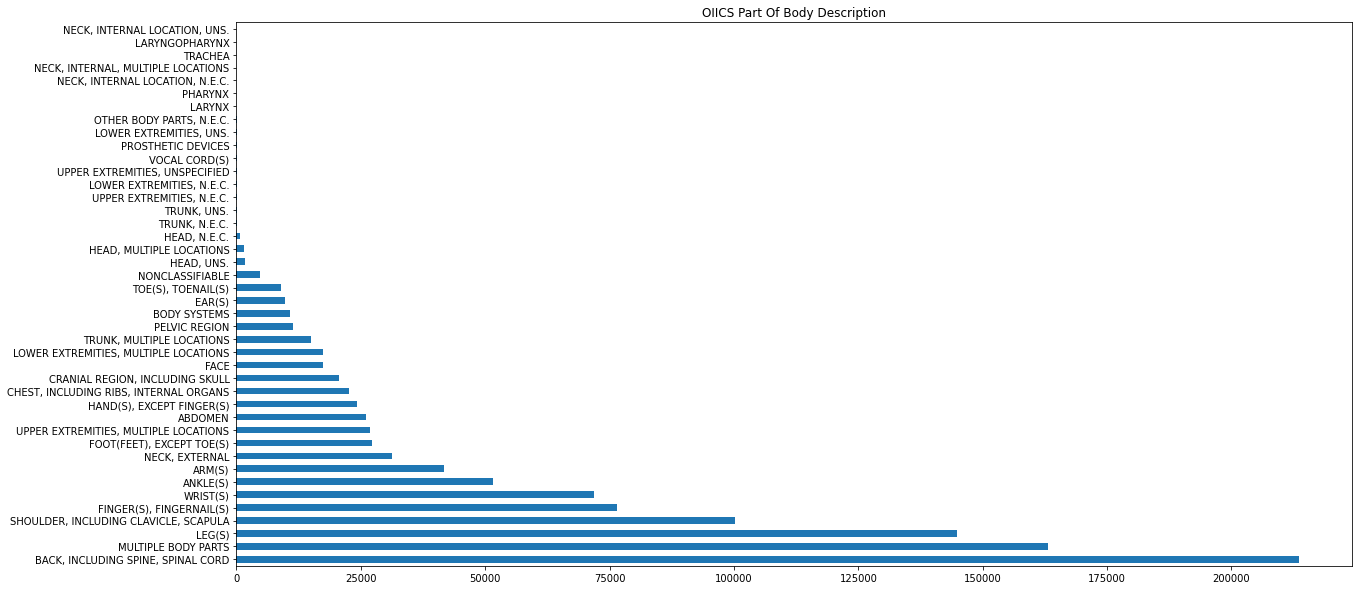

In [36]:
df['OIICS Part Of Body Description'].value_counts().plot(kind='barh', subplots=True, figsize=(20,10))

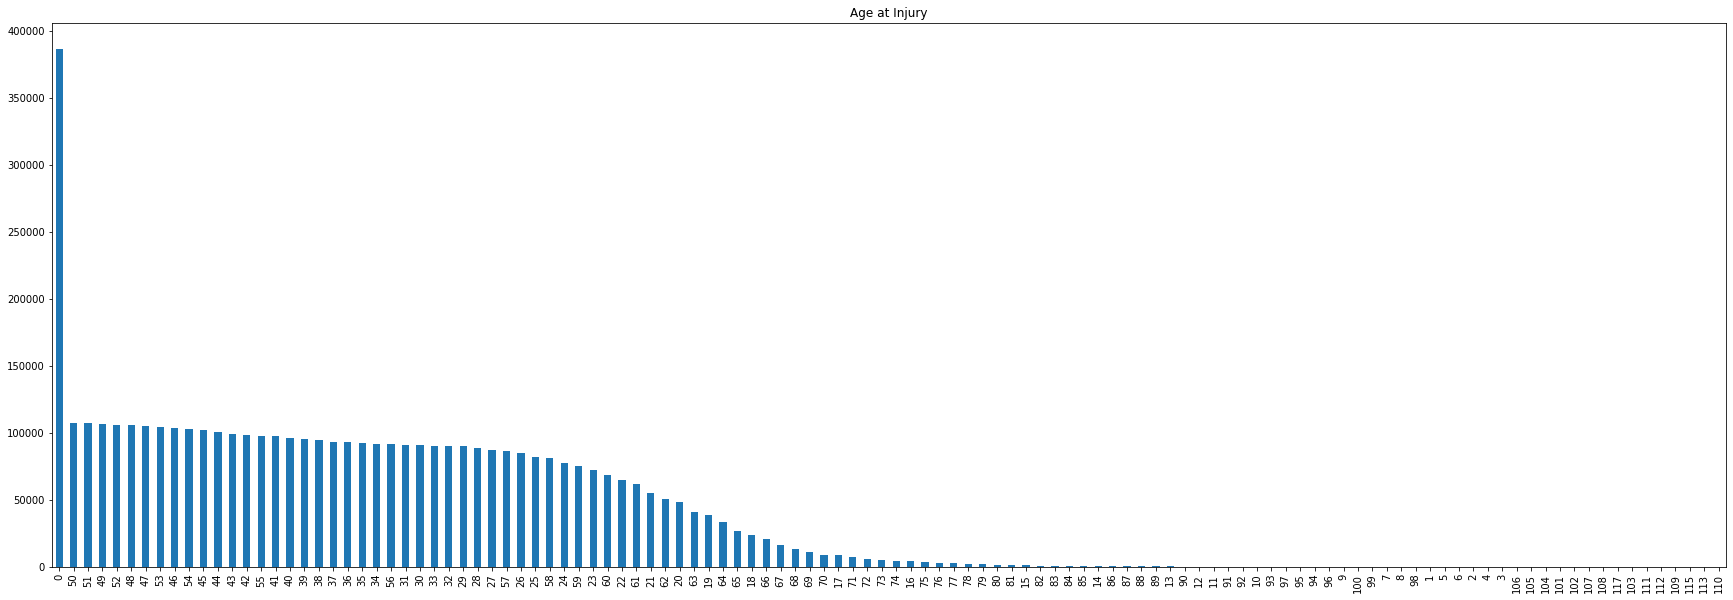

In [33]:

age_distribution = df['Age at Injury'].value_counts().plot(kind = 'bar', subplots=True, figsize = (30,10))


array([<AxesSubplot:title={'center':'Current Claim Status'}>],
      dtype=object)

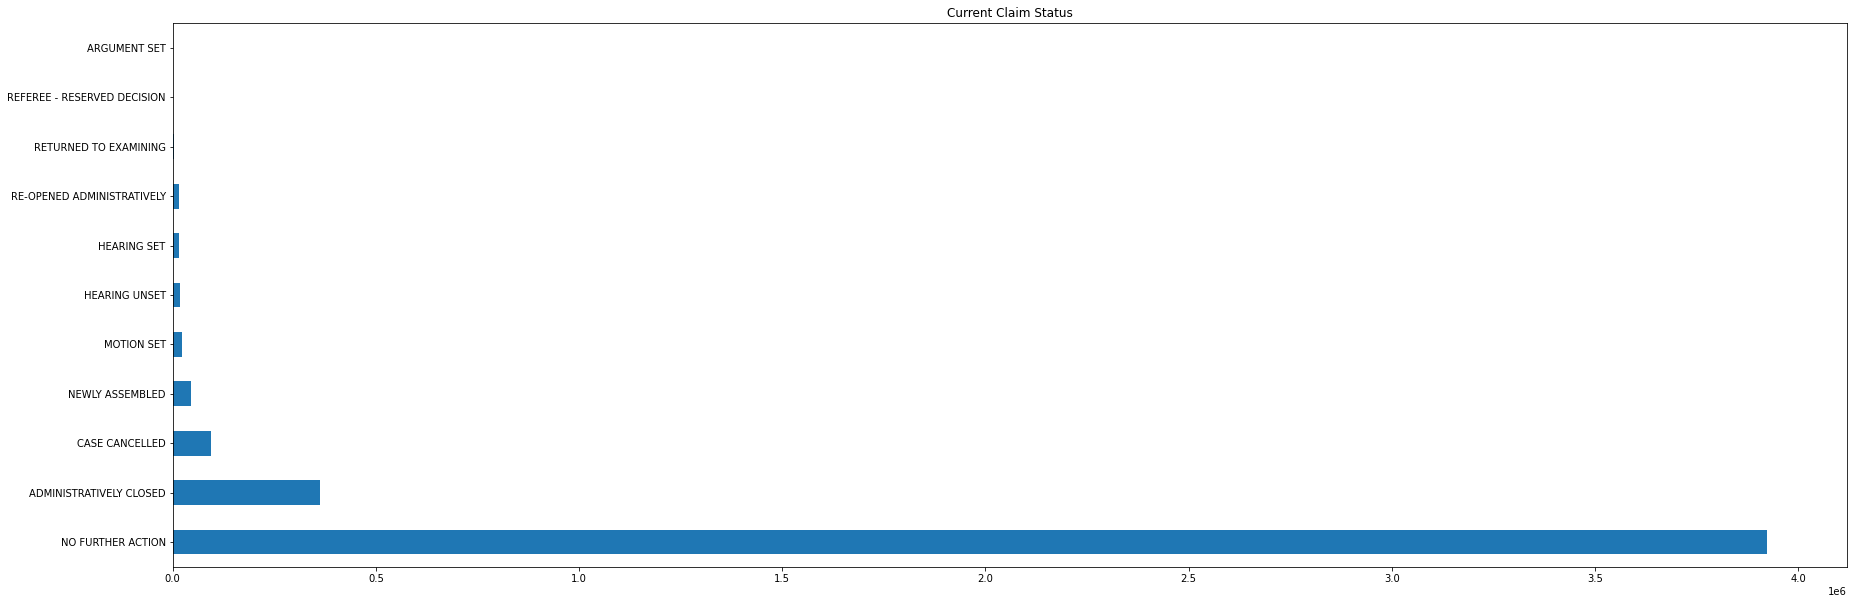

In [35]:
df['Current Claim Status'].value_counts().plot(kind='barh', subplots = True, figsize=(30,10))

array([<AxesSubplot:title={'center':'OIICS Nature of Injury Description'}>],
      dtype=object)

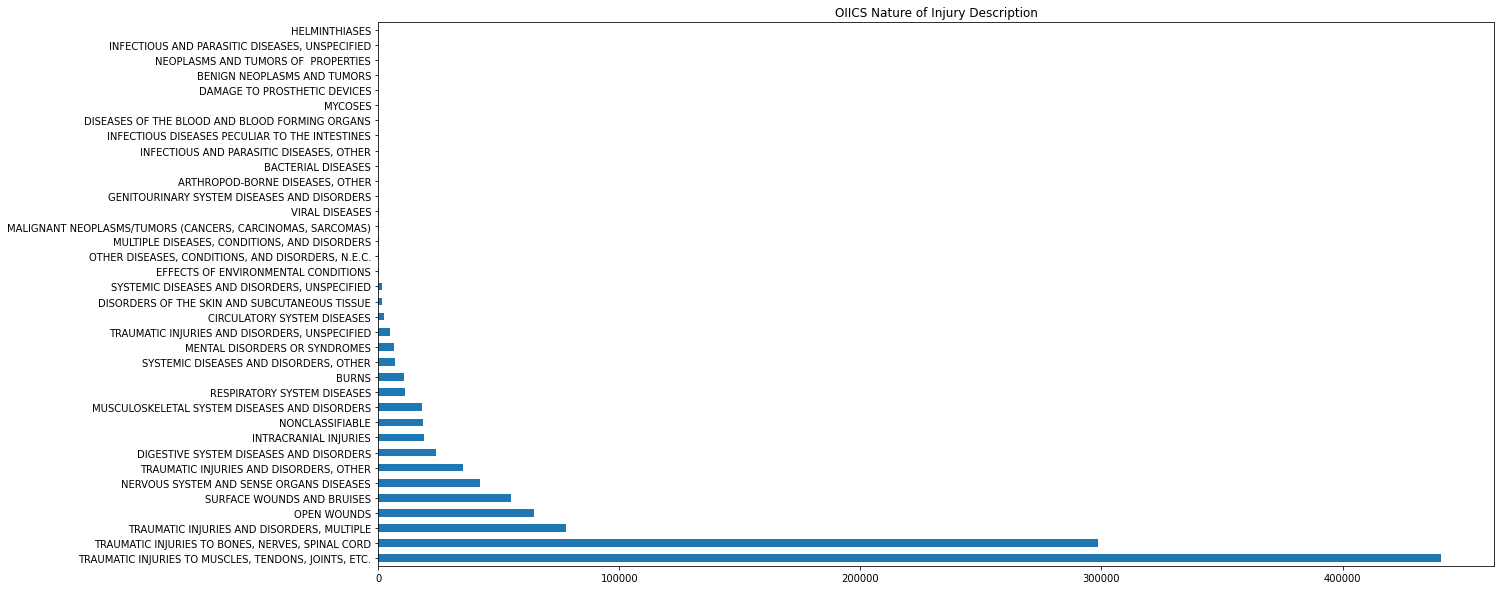

In [34]:
df['OIICS Nature of Injury Description'].value_counts().plot(kind='barh', subplots=True, figsize=(20,10))

In [ ]:
df['Carrier Name'] = df['Carrier Name'].str.replace(r'[^\w\s]+', '')
remove_words = ['CO', 'COMPANY', 'pls', 'CORP', 'CORPORATION', 'DIST', 'DISTRICT', 'INC', 'SCH', 'CSD', 'OF', 'C S D', 'COR', 'INS', 'DT', 'CT', 'LLC']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df['Carrier Name'] = df['Carrier Name'].str.replace(pat, '')

# group by carrier name

In [46]:
df['Carrier Name'].value_counts()

STATE INSURANCE FUND            985462
NEW HAMPSHIRE INSURANCE CO      169345
POLICE, FIRE, SANITATION        116534
INDEMNITY INS. OF N AMERICA     103622
CHARTER OAK FIRE INS CO          91953
                                 ...  
CONTINENTAL REINSURANCE CORP         1
INTERNATIONAL TERM. OPER. CO         1
BREWER TITCHENER CORP NY             1
HERKIMER C.S.D.                      1
CASE PAPER CO. INC.                  1
Name: Carrier Name, Length: 2677, dtype: int64

In [47]:
group_by_carrier = df.groupby(by=['Carrier Name'])


In [48]:
pd.set_option("display.max_rows", None)

avg_days_to_settle_claim = group_by_carrier['days_btw_claim_est_and_negotiated'].mean()
avg_days_to_settle_claim


Carrier Name
*** CARRIER UNDETERMINED ***      686 days 07:24:59.424184264
21ST CENTURY NATIONAL INS. CO.                            NaT
A I U INSURANCE COMPANY          1271 days 10:57:07.605633808
A P A TRANSPORT CORPORATION                1431 days 00:00:00
A T & T TECHNOLOGIES INC                                  NaT
ABA TRANSPORTATION HOLDING                 1344 days 13:20:00
ABA TRANSPORTATION HOLDING CO              2200 days 14:00:00
ABA TRANSPORTATION HOLDING CO.             1240 days 00:00:00
ABBOTT UFSD                                2061 days 00:00:00
ABBOTT UNION FREE                          4848 days 00:00:00
ABEX CORPORATION                              0 days 00:00:00
ABF FREIGHT SYSTEM, INC.         1640 days 08:06:45.633802816
ABF FREIGHT SYSTEMS INC DEL       752 days 17:08:34.285714288
ACADIA INSURANCE COMPANY          937 days 19:49:33.913043472
ACCIDENT FUND GENERAL                       536 days 00:00:00
ACCIDENT FUND GENERAL INS CO                190 days 00:0

In [79]:
group_by_carrier.mean()

,Age at Injury,Average Weekly Wage,Birth Year,Claim Identifier,Closed Count,Hearing Count,IME-4 Count,Industry Code,Interval Assembled to ANCR,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,accident_year,accident_month,Calculated_age
Carrier Name,,,,,,,,,,,,,,,
*** CARRIER UNDETERMINED ***,36.951329,55.007628,1731.983465,2.170108e+06,1.714106,2.433700,2.950347,48.772922,608.847319,53.110587,52.060074,53.167394,2008.219088,6.689813,266.921696
21ST CENTURY NATIONAL INS. CO.,33.916667,350.527500,1713.750000,7.728654e+05,2.000000,2.666667,2.857143,43.000000,232.000000,NaN,NaN,NaN,2004.2,6.15,338.5
A I U INSURANCE COMPANY,39.923965,360.908596,1751.122592,4.628912e+06,1.537316,0.670592,2.748716,50.544215,207.803001,53.718000,41.107831,43.864813,2016.715874,6.402807,264.25897
A P A TRANSPORT CORPORATION,34.333333,364.080000,1297.000000,6.589713e+05,2.666667,4.000000,1.000000,48.000000,349.500000,NaN,NaN,NaN,1998.0,8.666667,701.0
A T & T TECHNOLOGIES INC,0.000000,0.000000,1933.000000,8.464020e+05,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"YORKTOWN, TOWN OF",40.315245,634.755271,1773.617571,2.409822e+06,1.565891,0.542636,2.015385,91.682028,170.891566,51.447674,46.325581,43.238372,2010.496124,6.046512,236.878553
ZENITH INSURANCE COMPANY,35.820388,147.679806,1735.480583,3.292183e+06,1.594660,0.878641,5.733333,58.422680,276.539877,49.728261,43.981884,43.260870,2013.264198,6.590123,272.091358
ZURICH AMERICAN INSURANCE,40.519663,184.081615,1857.773876,3.910632e+06,1.491573,0.544944,2.759615,54.726331,256.023077,50.855869,39.551263,42.665185,2015.83921,6.552891,155.726375


In [70]:
carrier_gpd = group_by_carrier.get_group('STATE INSURANCE FUND')

In [75]:
carrier_gpd['days_btw_claim_est_and_negotiated'].mean()

Timedelta('1486 days 23:13:36.435612560')

# Grouping by Status of claims EDA



In [68]:
group_by_label = df.groupby(by=['Current Claim Status'])
gpd_settled = group_by_label.get_group('NO FURTHER ACTION')

In [69]:
gpd_settled

,Accident,Accident Date,Age at Injury,Alternative Dispute Resolution,ANCR Date,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,...,PTD Date,Section 32 Date,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,accident_year
3570699,Y,1925-11-18,0,N,NaN,10/17/2005,N,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10027,1925
3567784,Y,1929-12-10,0,N,NaN,10/21/2005,N,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22043,1929
3506105,Y,1930-01-30,0,N,NaN,03/31/2006,N,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07747,1930
2801097,Y,1930-07-10,0,N,NaN,03/18/2011,N,0.0,0,07/11/1930,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46647,1930
3571810,Y,1931-03-04,0,N,NaN,10/13/2005,N,0.0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90063,1931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4499594,Y,NaT,0,N,NaN,01/03/2000,N,0.0,1927,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11968,<NA>
4499653,Y,NaT,0,N,NaN,01/03/2000,N,0.0,0,11/24/1999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14425,<NA>
4499756,Y,NaT,0,N,NaN,01/03/2000,Y,0.0,0,01/24/2000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14012,<NA>
4499789,Y,NaT,0,N,NaN,01/01/2000,Y,0.0,1940,02/16/2001,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14624,<NA>


array([<AxesSubplot:title={'center':'accident_year'}>], dtype=object)

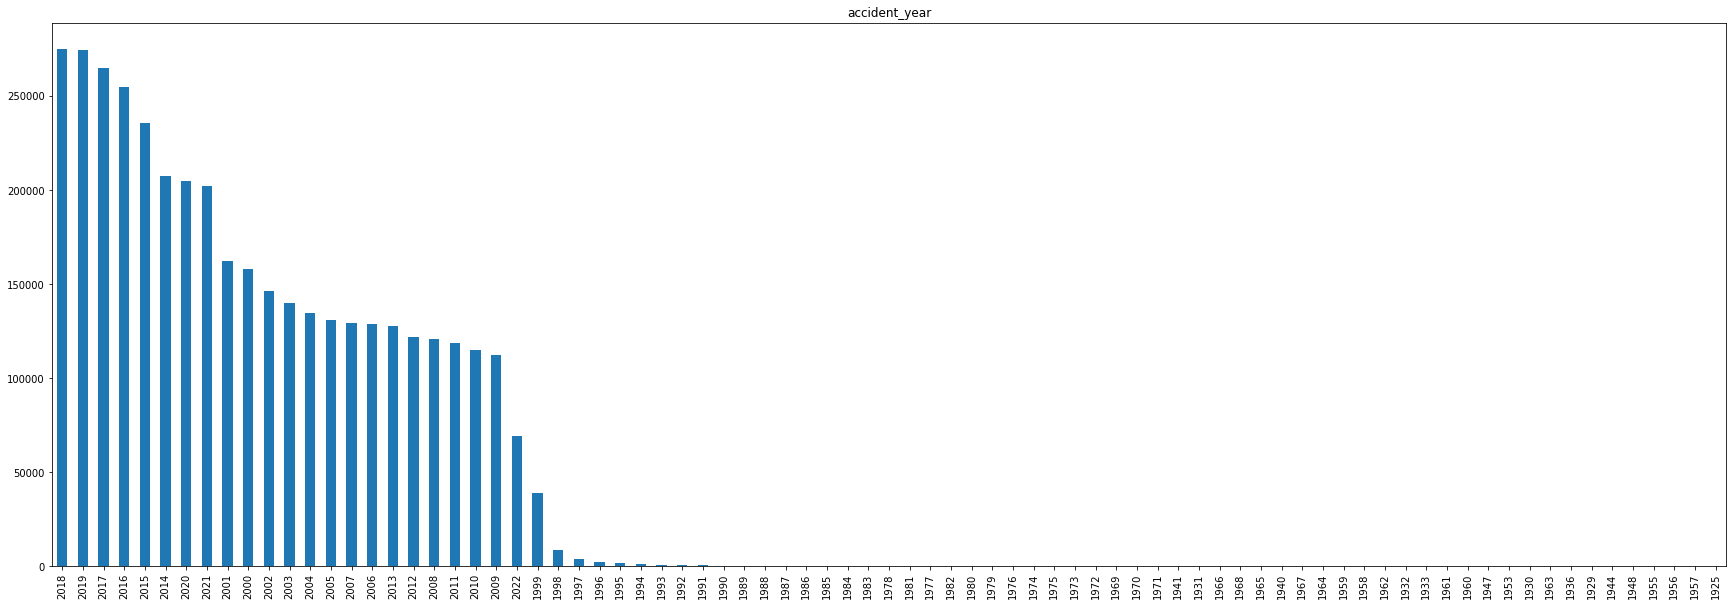

In [75]:
gpd_settled['accident_year'].value_counts().plot(kind = 'bar', subplots=True, figsize = (30,10))

array([<AxesSubplot:title={'center':'Age at Injury'}>], dtype=object)

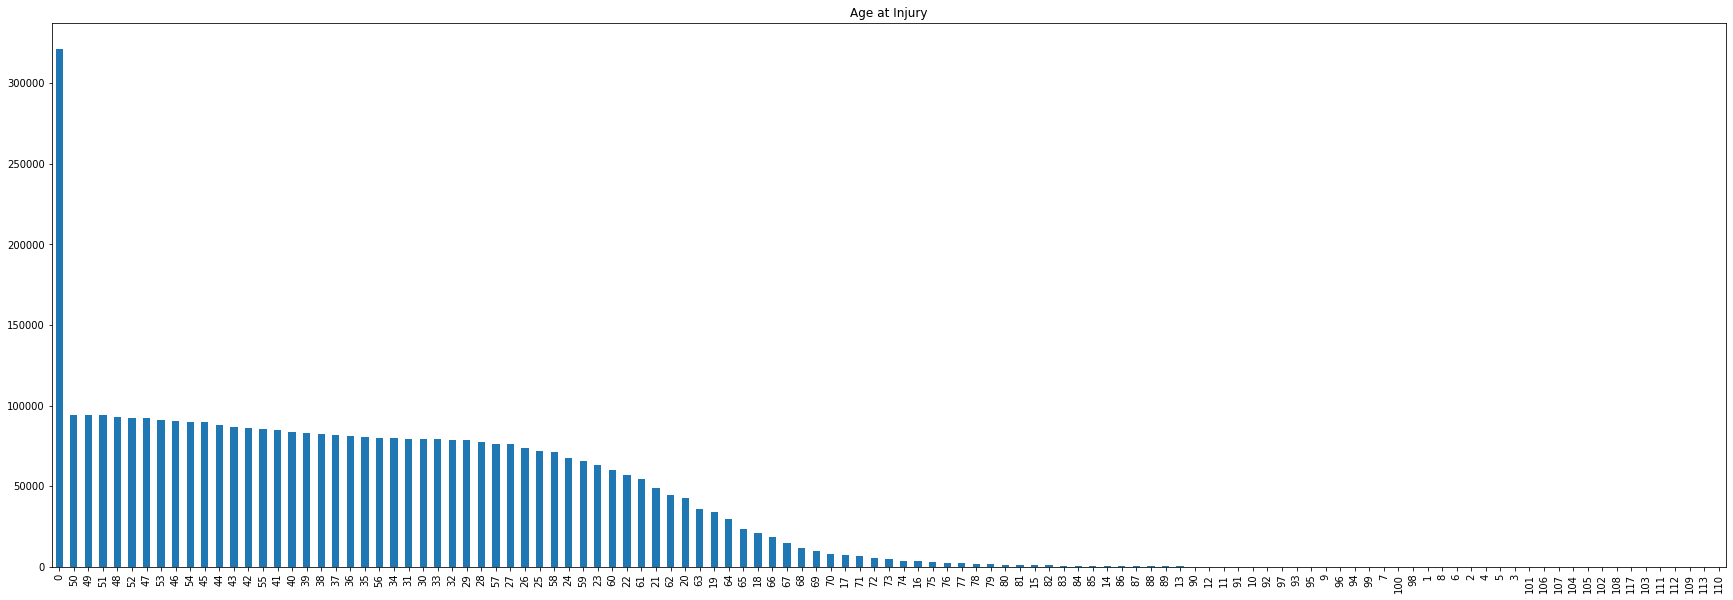

In [78]:
gpd_settled['Age at Injury'].value_counts().plot(kind = 'bar', subplots=True, figsize = (30,10))

array([<AxesSubplot:title={'center':'OIICS Nature of Injury Description'}>],
      dtype=object)

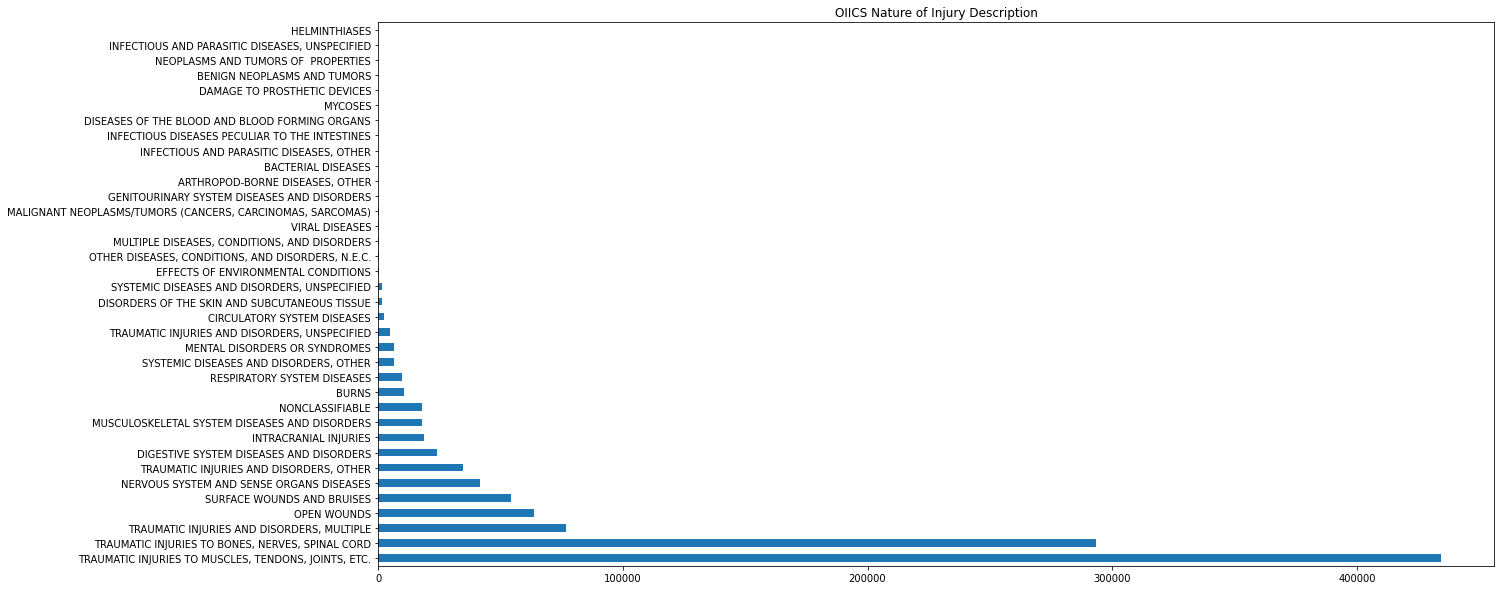

In [79]:
gpd_settled['OIICS Nature of Injury Description'].value_counts().plot(kind='barh', subplots=True, figsize=(20,10))

In [104]:
df.columns

Index(['Accident', 'Accident Date', 'Age at Injury',
       'Alternative Dispute Resolution', 'ANCR Date', 'Assembly Date',
       'Attorney/Representative', 'Average Weekly Wage', 'Birth Year',
       'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Identifier', 'Claim Injury Type', 'Claim Type', 'Closed Count',
       'Controverted Date', 'County of Injury', 'COVID-19 Indicator',
       'Current Claim Status', 'District Name', 'First Appeal Date',
       'First Hearing Date', 'Gender', 'Hearing Count', 'Highest Process',
       'IME-4 Count', 'Industry Code', 'Industry Code Description',
       'Interval Assembled to ANCR', 'Medical Fee Region',
       'Occupational Disease', 'OIICS Event Exposure Code',
       'OIICS Event Exposure Description', 'OIICS Injury Source Code',
       'OIICS Injury Source Description', 'OIICS Nature of Injury Code',
       'OIICS Nature of Injury Description', 'OIICS Part Of Body Code',
       'OIICS Part Of Body Description', 'OIICS

In [ ]:
'OIICS Event Exposure Description', 'OIICS Injury Source Code',
       'OIICS Injury Source Description', 'OIICS Nature of Injury Code',
       'OIICS Nature of Injury Description', 'OIICS Part Of Body Code',
       'OIICS Part Of Body Description', 'OIICS Secondary Source Code',
       'OIICS Secondary Source Description', 'PPD Non-Scheduled Loss Date',

array([<AxesSubplot:title={'center':'OIICS Event Exposure Description'}>],
      dtype=object)

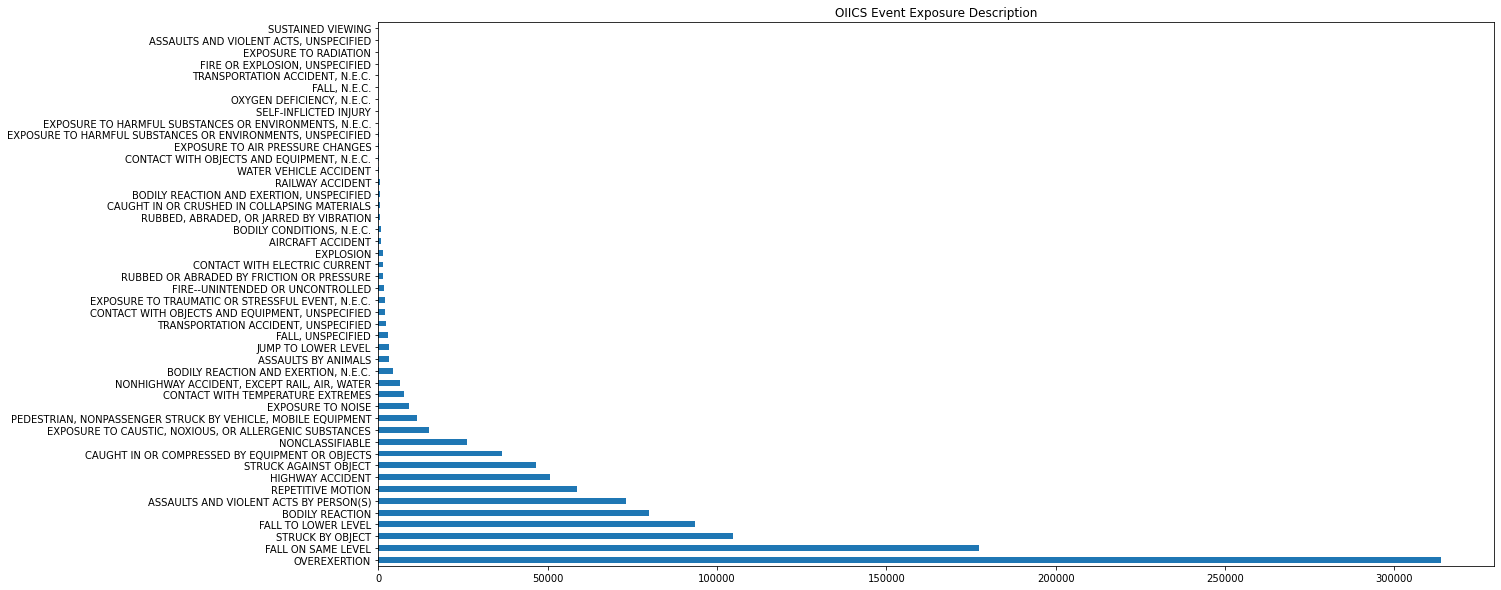

In [135]:
df['OIICS Event Exposure Description'].value_counts().plot(kind='barh', subplots=True, figsize=(20,10))

array([<AxesSubplot:title={'center':'OIICS Injury Source Description'}>],
      dtype=object)

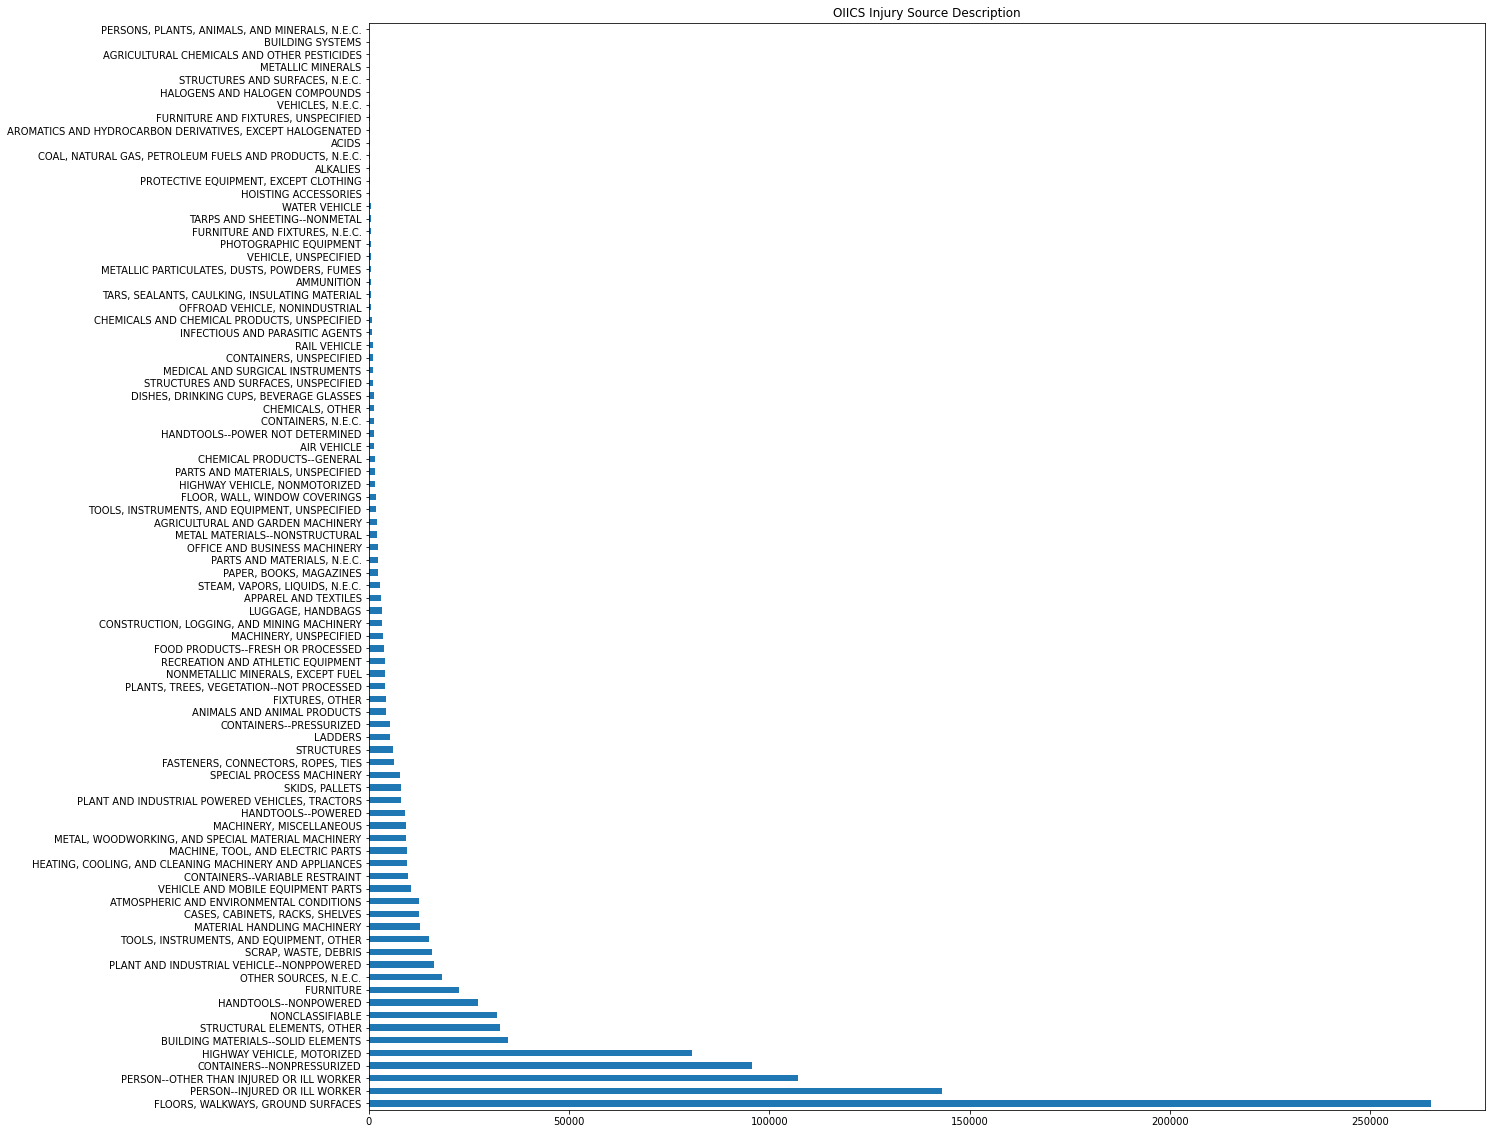

In [138]:
df['OIICS Injury Source Description'].value_counts().plot(kind='barh', subplots=True, figsize=(20,20))

In [172]:
group_by_label = df.groupby(by=['accident_year'])
year_grpd_df = group_by_label.get_group(2018)

In [173]:
year_grpd_df

,Accident,Accident Date,Age at Injury,Alternative Dispute Resolution,ANCR Date,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,...,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,accident_year,accident_month,Calculated_age,Diff_dates
1216017,Y,2018-01-01,29,N,NaT,01/04/2018,N,0.00,1988,01/04/2018,...,PERSON IN ACT OF A CRIME,1.0,NO PHYSICAL INJURY,66.0,NO PHYSICAL INJURY,12180,2018,1,30,NaT
928882,Y,2018-01-01,71,N,NaT,12/10/2018,N,0.00,1946,NaN,...,NaN,NaN,NaN,NaN,NaN,11757,2018,1,72,NaT
1212830,Y,2018-01-01,41,N,2019-02-11,01/09/2018,Y,1393.81,1976,02/28/2018,...,PUSHING OR PULLING,10.0,CONTUSION,35.0,HAND,11233,2018,1,42,406 days
1169181,Y,2018-01-01,62,N,2018-06-01,02/28/2018,N,0.00,1955,NaN,...,NaN,NaN,NaN,NaN,NaN,13224,2018,1,63,151 days
1132292,Y,2018-01-01,57,N,NaT,04/13/2018,Y,0.00,1960,04/13/2018,...,CONTINUAL NOISE,31.0,HEARING LOSS OR IMPAIRMENT,13.0,EAR(S),11780,2018,1,58,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913117,Y,2018-12-31,58,N,NaT,01/03/2019,N,0.00,1960,01/03/2019,...,PERSON IN ACT OF A CRIME,59.0,"ALL OTHER SPECIFIC INJURIES, NOC",65.0,INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLA...,11233,2018,12,58,NaT
911410,Y,2018-12-31,26,N,NaT,01/04/2019,N,0.00,1992,01/04/2019,...,"FELLOW WORKER, PATIENT OR OTHER PERSON",52.0,STRAIN OR TEAR,53.0,KNEE,11756,2018,12,26,NaT
897706,Y,2018-12-31,27,N,NaT,01/23/2019,N,0.00,1991,01/22/2019,...,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,37.0,THUMB,10019,2018,12,27,NaT
902811,Y,2018-12-31,62,N,NaT,01/16/2019,N,0.00,1956,01/16/2019,...,"STRAIN OR INJURY BY, NOC",49.0,SPRAIN OR TEAR,41.0,UPPER BACK AREA,11367,2018,12,62,NaT


array([<AxesSubplot:title={'center':'WCIO Cause of Injury Description'}>],
      dtype=object)

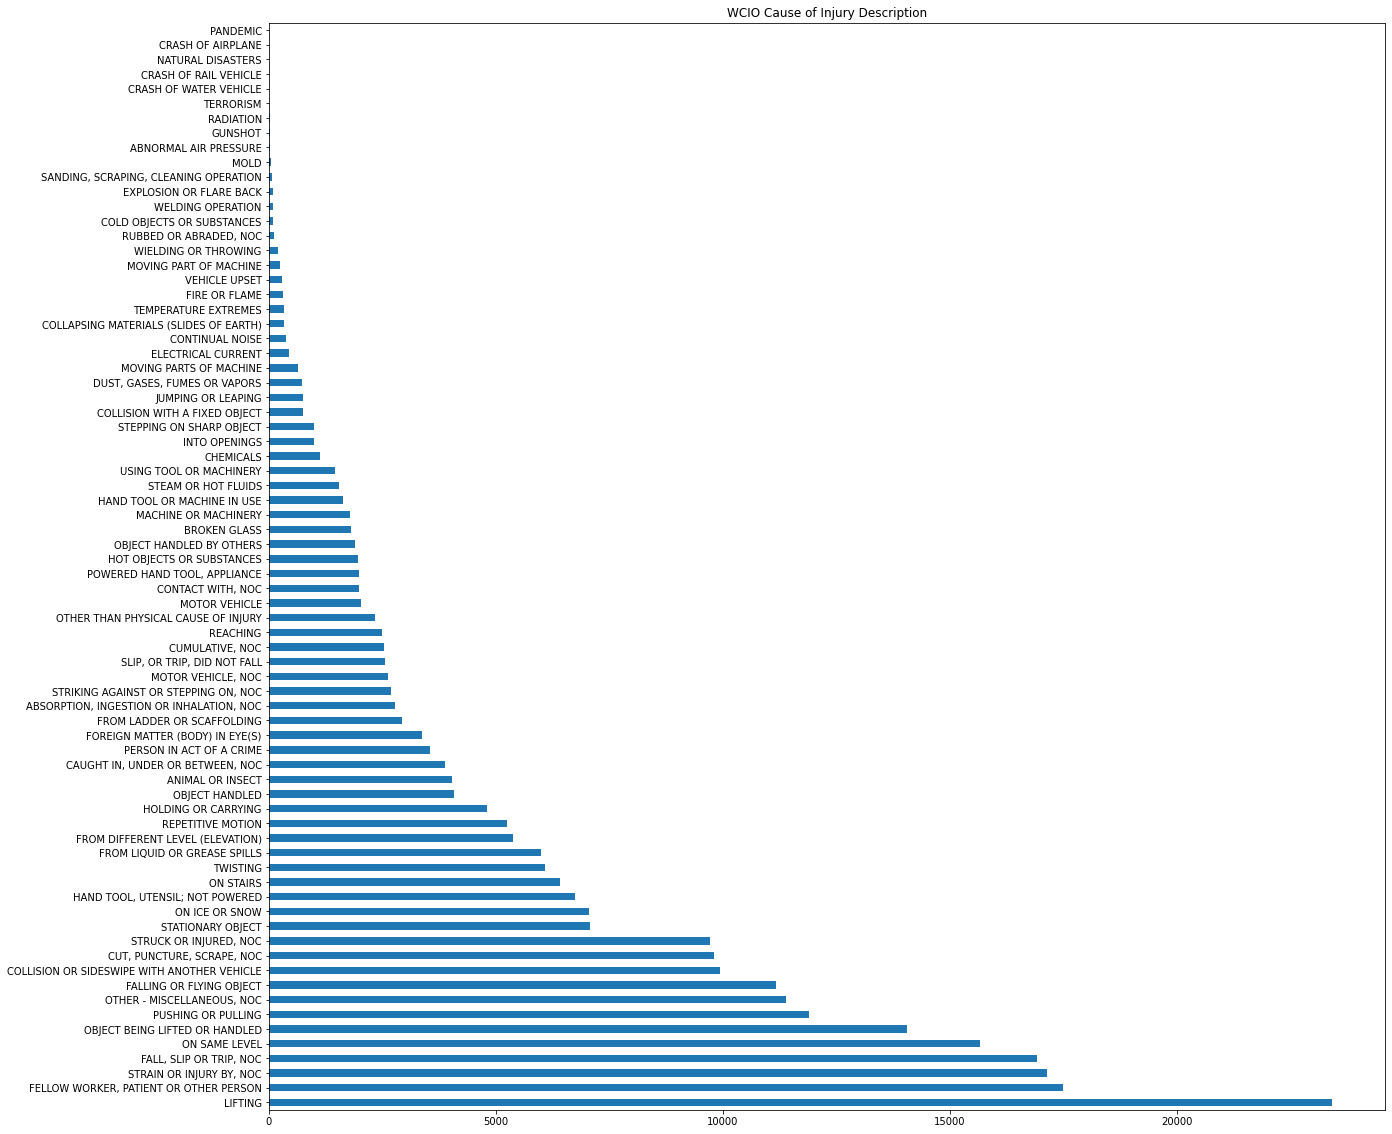

In [174]:
year_grpd_df['WCIO Cause of Injury Description'].value_counts().plot(kind='barh', subplots=True, figsize=(20,20))

In [175]:
year_grpd_df['WCIO Cause of Injury Description'].value_counts()

LIFTING                                   23412
FELLOW WORKER, PATIENT OR OTHER PERSON    17503
STRAIN OR INJURY BY, NOC                  17152
FALL, SLIP OR TRIP, NOC                   16921
ON SAME LEVEL                             15661
                                          ...  
CRASH OF WATER VEHICLE                       12
CRASH OF RAIL VEHICLE                        12
NATURAL DISASTERS                            12
CRASH OF AIRPLANE                             6
PANDEMIC                                      1
Name: WCIO Cause of Injury Description, Length: 74, dtype: int64